# Machine Learning Project - Social Anxiety

In this project, I analyse the 'Social Anxiety Dataset' dataset from Kaggle and then build different machine learning models to classify the individuals with high and low anxieties. This dataset contains information like demographics, lifestyle, health indicators, mental health history, and life events, about individuals with varying levels of social anxiety.

Additional informations:
* Data Source: https://www.kaggle.com/datasets/natezhang123/social-anxiety-dataset
* Sleep - in hours / day
* Physical Activity - in hours / week
* Caffeine Intake - in milligrams / day
* Alcohol Consumption - in drinks / week
* Heart Rate - in beats / minute (bpm)
* Breathing Rate - in breaths / minute
* Therapy Sessions - in sessions / month

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# setting display options
pd.options.display.expand_frame_repr = False
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100

### Loading Dataset

In [2]:
raw_df = pd.read_csv(r'Data_SocialAnxiety_Cleaned.csv')
raw_df.info()
raw_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  11000 non-null  int64  
 1   Age_group            11000 non-null  object 
 2   Gender               11000 non-null  object 
 3   Occupation           11000 non-null  object 
 4   Sleep                11000 non-null  float64
 5   Physical_activity    11000 non-null  float64
 6   Caffeine_intake      11000 non-null  int64  
 7   Alcohol_consumption  11000 non-null  int64  
 8   Smoking              11000 non-null  object 
 9   Family_history       11000 non-null  object 
 10  Stress_level         11000 non-null  int64  
 11  Heart_rate           11000 non-null  int64  
 12  Breathing_rate       11000 non-null  int64  
 13  Sweating_level       11000 non-null  int64  
 14  Dizziness            11000 non-null  object 
 15  Medication           11000 non-null 

,Age,Age_group,Gender,Occupation,Sleep,Physical_activity,Caffeine_intake,Alcohol_consumption,Smoking,Family_history,Stress_level,Heart_rate,Breathing_rate,Sweating_level,Dizziness,Medication,Therapy_sessions,Major_life_events,Diet_quality,Anxiety_level
0,29,ADULT,FEMALE,ARTIST,6.0,2.7,181,10,YES,NO,10,114,14,4,NO,YES,3,YES,7,5
1,46,MIDDLE AGED,OTHER,NURSE,6.2,5.7,200,8,YES,YES,1,62,23,2,YES,NO,2,NO,8,3
2,64,SENIOR,MALE,OTHER,5.0,3.7,117,4,NO,YES,1,91,28,3,NO,NO,1,YES,1,1
3,20,YOUNG ADULT,FEMALE,SCIENTIST,5.8,2.8,360,6,YES,NO,4,86,17,3,NO,NO,0,NO,1,2
4,49,MIDDLE AGED,FEMALE,OTHER,8.2,2.3,247,4,YES,NO,1,98,19,4,YES,YES,1,NO,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,YOUNG ADULT,FEMALE,ENGINEER,6.1,3.1,566,9,YES,NO,8,91,28,1,YES,YES,1,NO,3,6
10996,50,MIDDLE AGED,OTHER,TEACHER,6.6,3.6,64,17,YES,NO,7,95,17,3,NO,NO,2,NO,7,3
10997,29,ADULT,MALE,NURSE,6.7,6.9,159,14,NO,NO,8,72,16,1,YES,YES,2,YES,7,4
10998,53,MIDDLE AGED,OTHER,ARTIST,5.7,2.7,248,8,NO,NO,4,112,28,3,YES,YES,1,YES,2,4


### Statistical Analysis

Describe

In [3]:
raw_df.describe()

,Age,Sleep,Physical_activity,Caffeine_intake,Alcohol_consumption,Stress_level,Heart_rate,Breathing_rate,Sweating_level,Therapy_sessions,Diet_quality,Anxiety_level
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


Correlation

                          Age     Sleep  Physical_activity  Caffeine_intake  Alcohol_consumption  Stress_level  Heart_rate  Breathing_rate  Sweating_level  Therapy_sessions  Diet_quality  Anxiety_level
Age                  1.000000 -0.148349           0.037240        -0.038398            -0.015953     -0.044824   -0.032022       -0.013896       -0.020483         -0.087185      0.048677      -0.074316
Sleep               -0.148349  1.000000           0.174526        -0.208659            -0.068068     -0.177315   -0.138254       -0.119872       -0.118197         -0.309251      0.154110      -0.493836
Physical_activity    0.037240  0.174526           1.000000        -0.115298            -0.032936     -0.103475   -0.076846       -0.071195       -0.075107         -0.188324      0.085587      -0.243187
Caffeine_intake     -0.038398 -0.208659          -0.115298         1.000000             0.036401      0.121424    0.076555        0.080000        0.076011          0.216682     -0.089457      

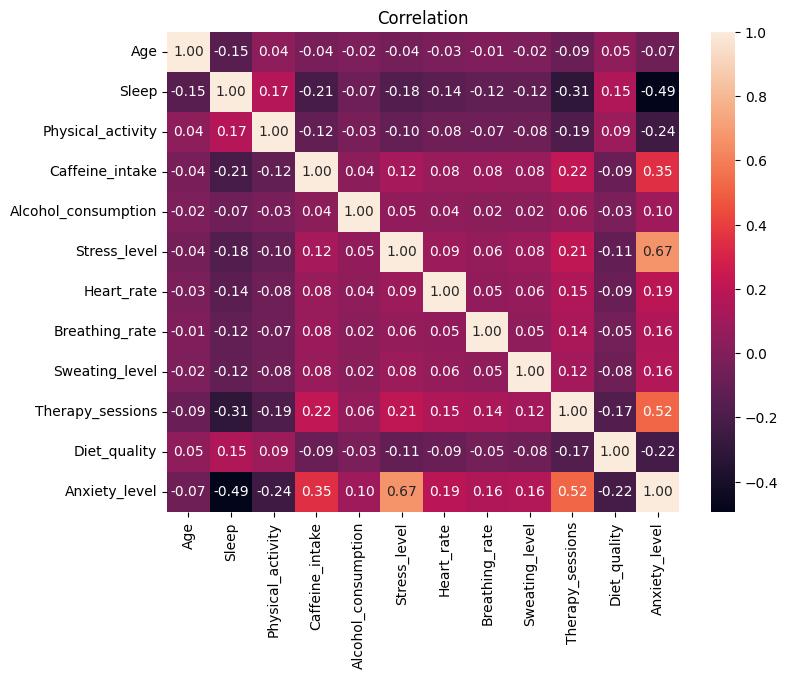

In [4]:
print(raw_df.corr(numeric_only=True))
ax = plt.axes((0,0,1,1))
sns.heatmap(raw_df.corr(numeric_only=True), annot=True, fmt='.2f', ax=ax)
plt.title('Correlation')
plt.show()

Covariance

In [5]:
raw_df.cov(numeric_only=True)

,Age,Sleep,Physical_activity,Caffeine_intake,Alcohol_consumption,Stress_level,Heart_rate,Breathing_rate,Sweating_level,Therapy_sessions,Diet_quality,Anxiety_level
Age,175.195404,-2.410300,0.900960,-73.599264,-1.201441,-1.736710,-7.343544,-0.949097,-0.379254,-2.519281,1.865401,-2.087842
Sleep,-2.410300,1.506778,0.391580,-37.091025,-0.475401,-0.637122,-2.940318,-0.759281,-0.202961,-0.828725,0.547697,-1.286655
Physical_activity,0.900960,0.391580,3.340946,-30.518485,-0.342532,-0.553634,-2.433600,-0.671499,-0.192042,-0.751477,0.452925,-0.943473
Caffeine_intake,-73.599264,-37.091025,-30.518485,20970.850341,29.992216,51.471243,192.074658,59.780074,15.397961,68.502451,-37.506773,107.779792
Alcohol_consumption,-1.201441,-0.475401,-0.342532,29.992216,32.372831,0.857858,4.364152,0.695578,0.188167,0.769261,-0.487615,1.215217
Stress_level,-1.736710,-0.637122,-0.553634,51.471243,0.857858,8.568511,4.486706,0.945261,0.347796,1.336208,-0.932969,4.149959
Heart_rate,-7.343544,-2.940318,-2.433600,192.074658,4.364152,4.486706,300.180597,4.763594,1.506729,5.854924,-4.324666,6.946698
Breathing_rate,-0.949097,-0.759281,-0.671499,59.780074,0.695578,0.945261,4.763594,26.626709,0.349001,1.565760,-0.807263,1.720067
Sweating_level,-0.379254,-0.202961,-0.192042,15.397961,0.188167,0.347796,1.506729,0.349001,1.956857,0.359353,-0.313690,0.475285
Therapy_sessions,-2.519281,-0.828725,-0.751477,68.502451,0.769261,1.336208,5.854924,1.565760,0.359353,4.765950,-1.092884,2.398438


Pair Plot

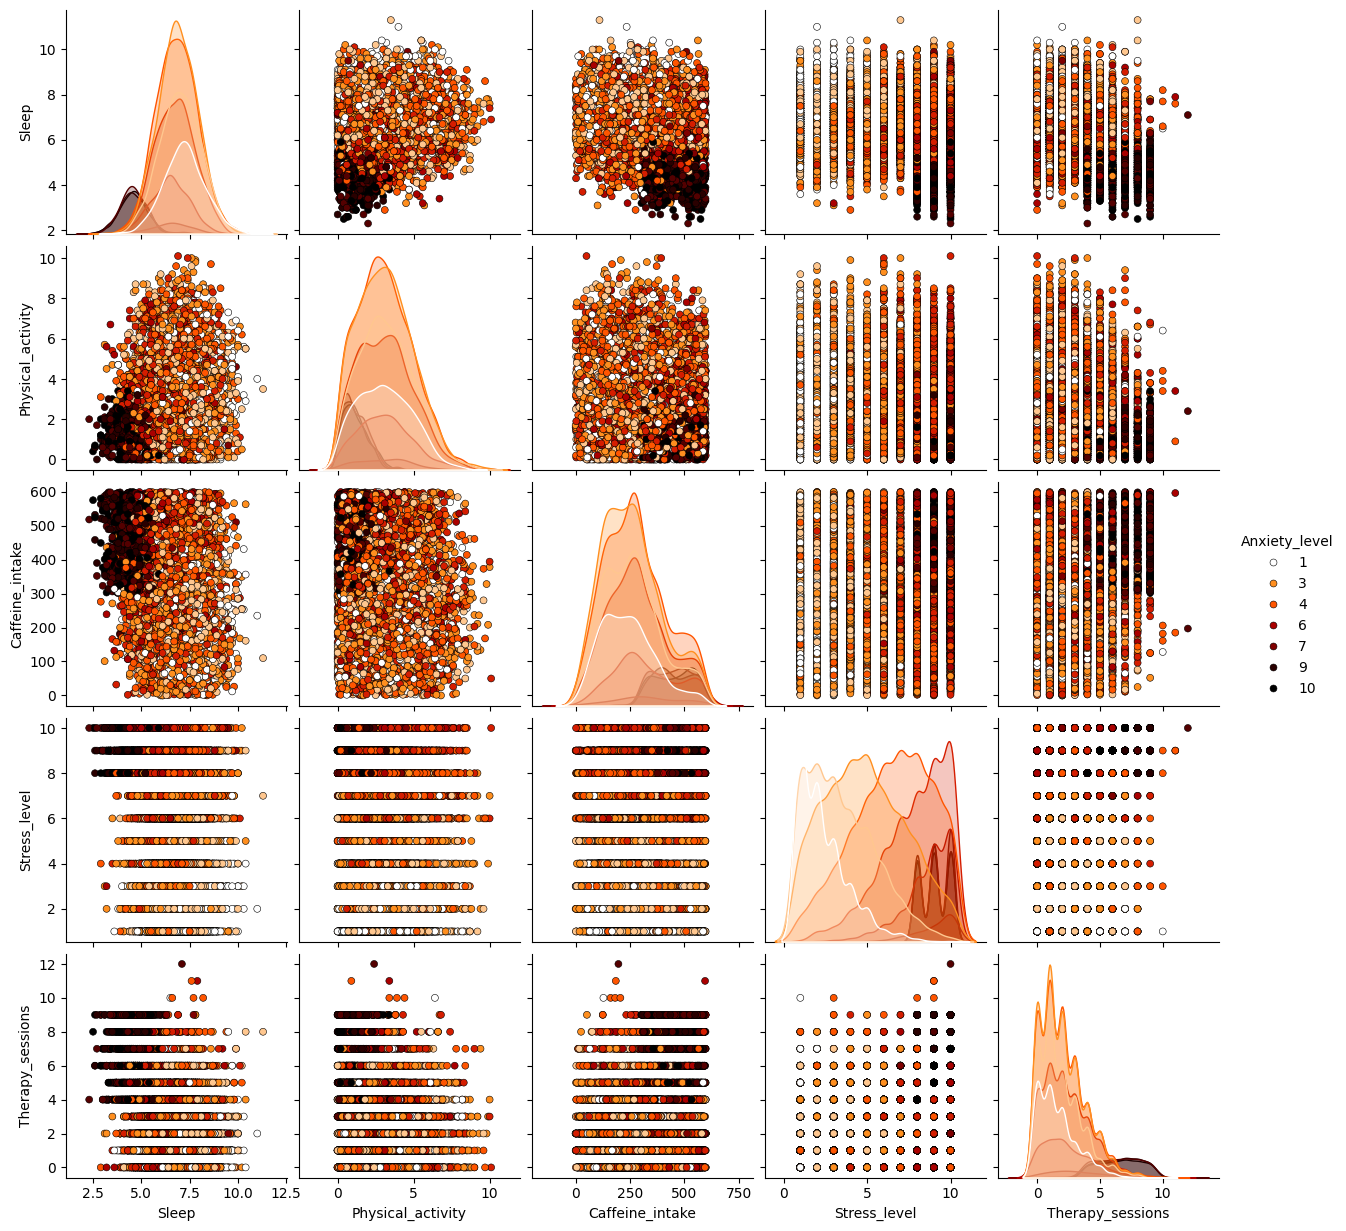

In [6]:
plot_kws = {'s': 25, 'edgecolor': 'k', 'linewidth': 0.4}
sns.pairplot(raw_df, vars=['Sleep', 'Physical_activity', 'Caffeine_intake', 'Stress_level', 
             'Therapy_sessions'], hue ='Anxiety_level', palette='gist_heat_r', plot_kws=plot_kws)
plt.show()

### Cleaned Data

In [7]:
raw_df.info()
raw_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  11000 non-null  int64  
 1   Age_group            11000 non-null  object 
 2   Gender               11000 non-null  object 
 3   Occupation           11000 non-null  object 
 4   Sleep                11000 non-null  float64
 5   Physical_activity    11000 non-null  float64
 6   Caffeine_intake      11000 non-null  int64  
 7   Alcohol_consumption  11000 non-null  int64  
 8   Smoking              11000 non-null  object 
 9   Family_history       11000 non-null  object 
 10  Stress_level         11000 non-null  int64  
 11  Heart_rate           11000 non-null  int64  
 12  Breathing_rate       11000 non-null  int64  
 13  Sweating_level       11000 non-null  int64  
 14  Dizziness            11000 non-null  object 
 15  Medication           11000 non-null 

,Age,Age_group,Gender,Occupation,Sleep,Physical_activity,Caffeine_intake,Alcohol_consumption,Smoking,Family_history,Stress_level,Heart_rate,Breathing_rate,Sweating_level,Dizziness,Medication,Therapy_sessions,Major_life_events,Diet_quality,Anxiety_level
0,29,ADULT,FEMALE,ARTIST,6.0,2.7,181,10,YES,NO,10,114,14,4,NO,YES,3,YES,7,5
1,46,MIDDLE AGED,OTHER,NURSE,6.2,5.7,200,8,YES,YES,1,62,23,2,YES,NO,2,NO,8,3
2,64,SENIOR,MALE,OTHER,5.0,3.7,117,4,NO,YES,1,91,28,3,NO,NO,1,YES,1,1
3,20,YOUNG ADULT,FEMALE,SCIENTIST,5.8,2.8,360,6,YES,NO,4,86,17,3,NO,NO,0,NO,1,2
4,49,MIDDLE AGED,FEMALE,OTHER,8.2,2.3,247,4,YES,NO,1,98,19,4,YES,YES,1,NO,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,YOUNG ADULT,FEMALE,ENGINEER,6.1,3.1,566,9,YES,NO,8,91,28,1,YES,YES,1,NO,3,6
10996,50,MIDDLE AGED,OTHER,TEACHER,6.6,3.6,64,17,YES,NO,7,95,17,3,NO,NO,2,NO,7,3
10997,29,ADULT,MALE,NURSE,6.7,6.9,159,14,NO,NO,8,72,16,1,YES,YES,2,YES,7,4
10998,53,MIDDLE AGED,OTHER,ARTIST,5.7,2.7,248,8,NO,NO,4,112,28,3,YES,YES,1,YES,2,4


### Data Analysis

##### Q1. What are the distribution of Anxiety levels (Target class)?

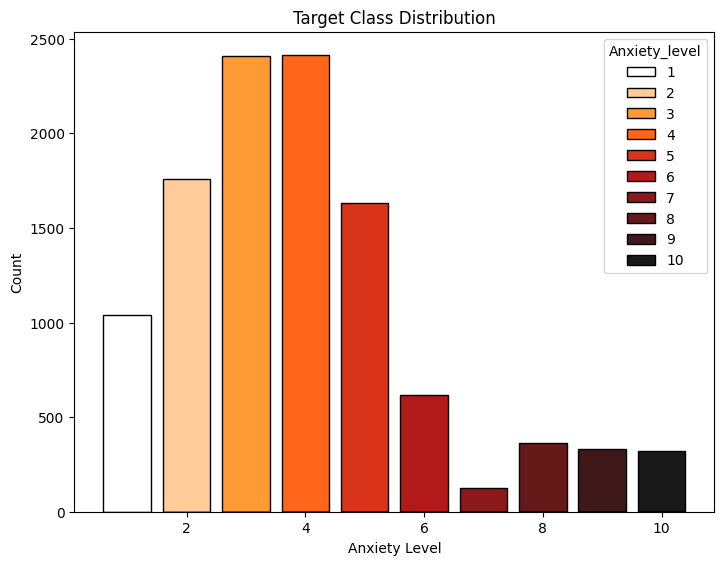

In [8]:
ax = plt.axes((0,0,1,1))
sns.histplot(x='Anxiety_level', data=raw_df, hue='Anxiety_level', palette='gist_heat_r', ax=ax,
             discrete=True, shrink=0.8, alpha=0.9)
ax.set_title('Target Class Distribution')
ax.set_xlabel('Anxiety Level')
ax.set_ylabel('Count')
plt.show()

##### Q2. How does Age and Physical Activity help in classifying the individuals?

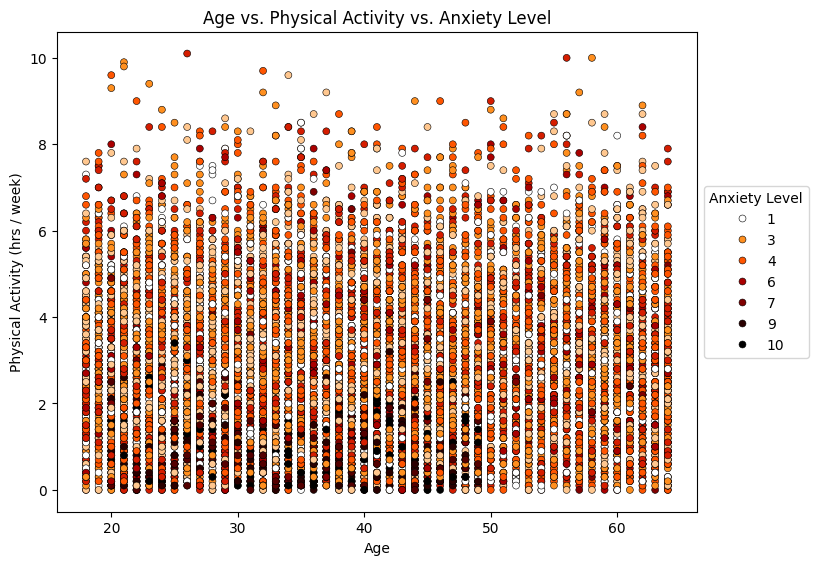

In [9]:
df = raw_df[['Age', 'Physical_activity', 'Anxiety_level']]

ax = plt.axes((0,0,1,1))
ax = sns.scatterplot(data=df, x='Age', y='Physical_activity', hue='Anxiety_level', 
                     palette='gist_heat_r', s=25, edgecolor='k', linewidth=0.4, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Physical Activity (hrs / week)')
ax.set_title('Age vs. Physical Activity vs. Anxiety Level')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Anxiety Level')
plt.show()

Key points to observe from the plot:
1. People between the Ages of 20 and 50 who have less than 2 hours of Physical Activity per week tend to have high Anxiety Levels.

##### Q3. How do Therapy Sessions help in classifying the individuals?

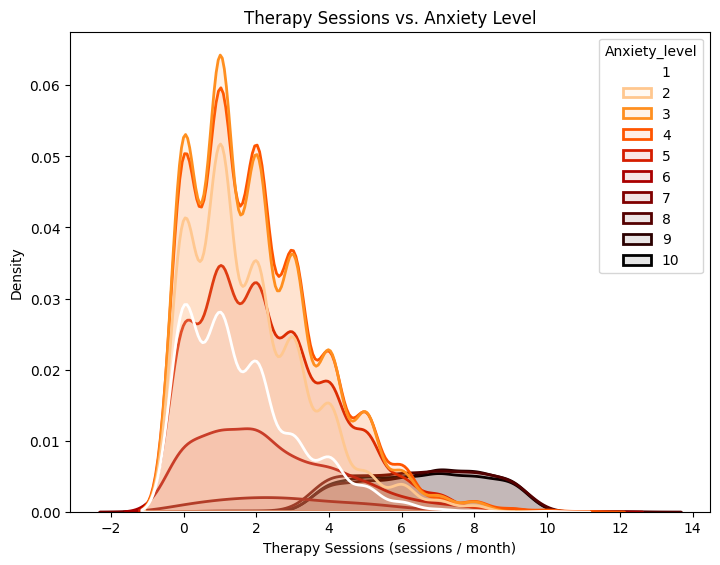

In [10]:
df = raw_df[['Therapy_sessions', 'Anxiety_level']]

ax = plt.axes((0,0,1,1))
ax = sns.kdeplot(data=df, x="Therapy_sessions", hue="Anxiety_level", palette="gist_heat_r", ax=ax, 
                 fill=True, common_norm=True, alpha=0.1, linewidth=2)
ax.set_xlabel('Therapy Sessions (sessions / month)')
ax.set_title('Therapy Sessions vs. Anxiety Level')
plt.show()

Key points to observe from the plot:
1. People with high Anxiety Levels have more Therapy Sessions per month.

##### Q4. How does Sleep and Caffeine Intake help in classifying the individuals?

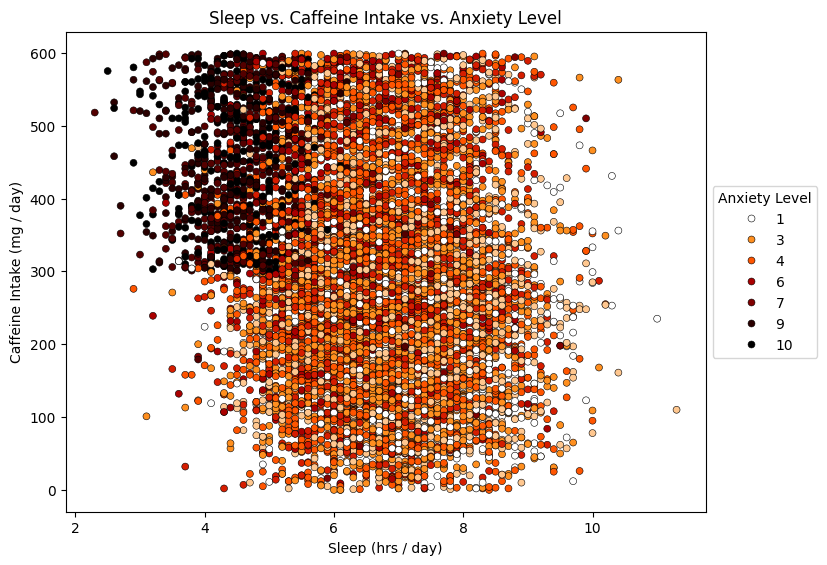

In [11]:
df = raw_df[['Sleep', 'Caffeine_intake', 'Anxiety_level']]

ax = plt.axes((0,0,1,1))
ax = sns.scatterplot(data=df, x='Sleep', y='Caffeine_intake', hue='Anxiety_level', 
                     palette='gist_heat_r', s=25, edgecolor='k', linewidth=0.4, ax=ax)
ax.set_xlabel('Sleep (hrs / day)')
ax.set_ylabel('Caffeine Intake (mg / day)')
ax.set_title('Sleep vs. Caffeine Intake vs. Anxiety Level')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Anxiety Level')
plt.show()

Key points to observe from the plot:
1. People who Sleep less than 6 hours a day and intake more than 300 mg of Caffeine per day tend to have high Anxiety Levels.

##### Q5. How do Stress Levels help in classifying the individuals?

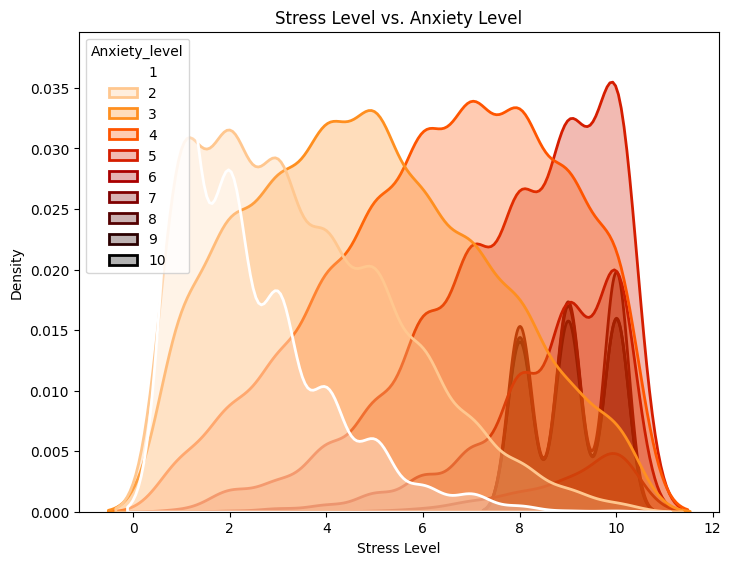

In [12]:
df = raw_df[['Stress_level', 'Anxiety_level']]

ax = plt.axes((0,0,1,1))
ax = sns.kdeplot(data=df, x="Stress_level", hue="Anxiety_level", palette="gist_heat_r", ax=ax, 
                 fill=True, common_norm=True, alpha=0.3, linewidth=2)
ax.set_xlabel('Stress Level')
ax.set_title('Stress Level vs. Anxiety Level')
plt.show()

Key points to observe from the plot:
1. People with high Stress Levels also have high Anxiety Levels.

### Building Models

As seen from the analysis, Anxiety Levels 8-10 show clear variation in most of the features when compared to the rest of the levels. Hence the levels 8-10 can be considered as high Anxiety and the rest as low/no Anxiety. So the high Anxiety levels can be relabelled as 1 and the low/no Anxiety levels as 0.

In [13]:
# Data
raw_df

,Age,Age_group,Gender,Occupation,Sleep,Physical_activity,Caffeine_intake,Alcohol_consumption,Smoking,Family_history,Stress_level,Heart_rate,Breathing_rate,Sweating_level,Dizziness,Medication,Therapy_sessions,Major_life_events,Diet_quality,Anxiety_level
0,29,ADULT,FEMALE,ARTIST,6.0,2.7,181,10,YES,NO,10,114,14,4,NO,YES,3,YES,7,5
1,46,MIDDLE AGED,OTHER,NURSE,6.2,5.7,200,8,YES,YES,1,62,23,2,YES,NO,2,NO,8,3
2,64,SENIOR,MALE,OTHER,5.0,3.7,117,4,NO,YES,1,91,28,3,NO,NO,1,YES,1,1
3,20,YOUNG ADULT,FEMALE,SCIENTIST,5.8,2.8,360,6,YES,NO,4,86,17,3,NO,NO,0,NO,1,2
4,49,MIDDLE AGED,FEMALE,OTHER,8.2,2.3,247,4,YES,NO,1,98,19,4,YES,YES,1,NO,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,YOUNG ADULT,FEMALE,ENGINEER,6.1,3.1,566,9,YES,NO,8,91,28,1,YES,YES,1,NO,3,6
10996,50,MIDDLE AGED,OTHER,TEACHER,6.6,3.6,64,17,YES,NO,7,95,17,3,NO,NO,2,NO,7,3
10997,29,ADULT,MALE,NURSE,6.7,6.9,159,14,NO,NO,8,72,16,1,YES,YES,2,YES,7,4
10998,53,MIDDLE AGED,OTHER,ARTIST,5.7,2.7,248,8,NO,NO,4,112,28,3,YES,YES,1,YES,2,4


In [14]:
# Relabelling Anxiety_level
raw_df['Anxiety_level'] = raw_df['Anxiety_level'].apply(lambda x: 0 if x < 8 else 1)
raw_df = raw_df.rename(columns={'Anxiety_level': 'Anxiety'})

In [15]:
# Removing Age_group column since it is collinear to Age
raw_df = raw_df.drop('Age_group', axis=1)

In [16]:
# Separating numerical and categorical columns
num_columns = raw_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_columns.remove('Anxiety')
cat_columns = raw_df.select_dtypes(include=['object']).columns.tolist()

In [17]:
# Separating Features and Target
X = raw_df.drop('Anxiety', axis=1)
y = raw_df[['Anxiety']].values.flatten()

print(X.shape)

(11000, 18)


In [18]:
# Encoding and Scaling
transformer = ColumnTransformer([('cat', OneHotEncoder(drop='first', sparse_output=False), cat_columns), 
                                 ('num', StandardScaler(), num_columns)], remainder='passthrough')
X = transformer.fit_transform(X)
print(X.shape)

n_data = X.shape[0]
n_features = X.shape[1]
labels = np.unique(y)

(11000, 30)


In [19]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##### Logistic Regression Model

              precision    recall  f1-score   support

           0     0.9990    0.9904    0.9947      1982
           1     0.9191    0.9908    0.9536       218

    accuracy                         0.9905      2200
   macro avg     0.9591    0.9906    0.9742      2200
weighted avg     0.9911    0.9905    0.9906      2200

Log Loss: 0.0303
AUC Score: 99.92%


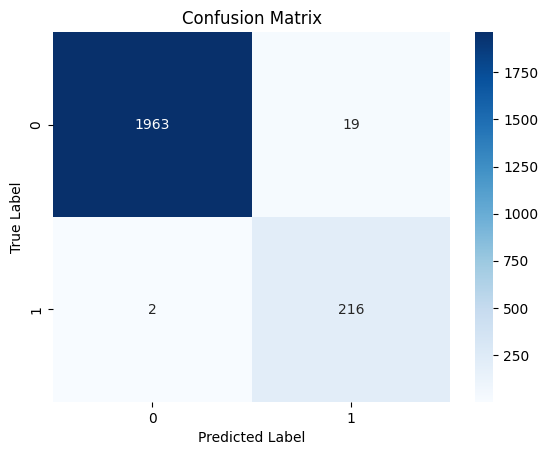

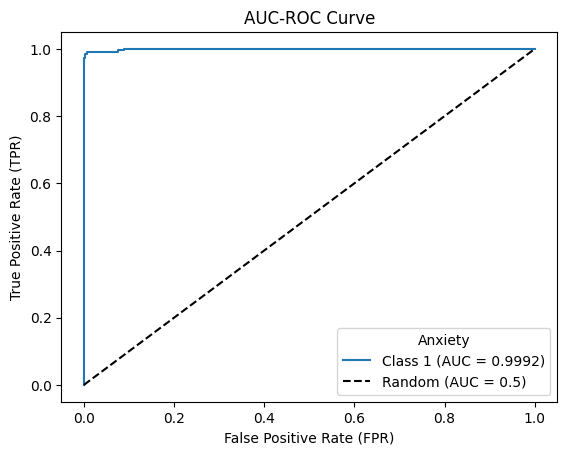

In [20]:
# Train model
model_log = LogisticRegression(class_weight='balanced', random_state=42)
model_log.fit(X_train, y_train)

# Evaluate model
y_pred = model_log.predict(X_test)
y_prob = model_log.predict_proba(X_test)

report = classification_report(y_test, y_pred, digits=4)
print(report)

logloss = log_loss(y_test, y_prob[:, 1])
print(f"Log Loss: {logloss:.4f}")

auc_score = roc_auc_score(y_test, y_prob[:, 1])
print(f"AUC Score: {auc_score * 100:.2f}%")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot the AUC-ROC Curve for each class
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class {labels[1]} (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve')
plt.legend(title='Anxiety')
plt.show()

##### K-Nearest Neighbors Model

              precision    recall  f1-score   support

           0     0.9990    0.9980    0.9985      1982
           1     0.9818    0.9908    0.9863       218

    accuracy                         0.9973      2200
   macro avg     0.9904    0.9944    0.9924      2200
weighted avg     0.9973    0.9973    0.9973      2200



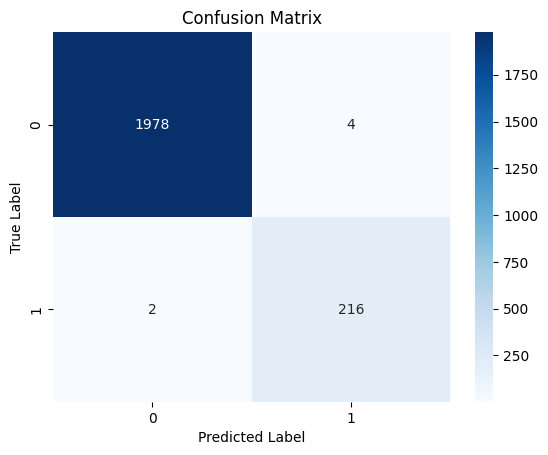

In [21]:
# Train model
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

# Evaluate model
y_pred = model_knn.predict(X_test)

report = classification_report(y_test, y_pred, digits=4)
print(report)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##### Naive Bayes Model

              precision    recall  f1-score   support

           0     0.9990    0.9990    0.9990      1982
           1     0.9908    0.9908    0.9908       218

    accuracy                         0.9982      2200
   macro avg     0.9949    0.9949    0.9949      2200
weighted avg     0.9982    0.9982    0.9982      2200

Log Loss: 0.0194
AUC Score: 99.86%


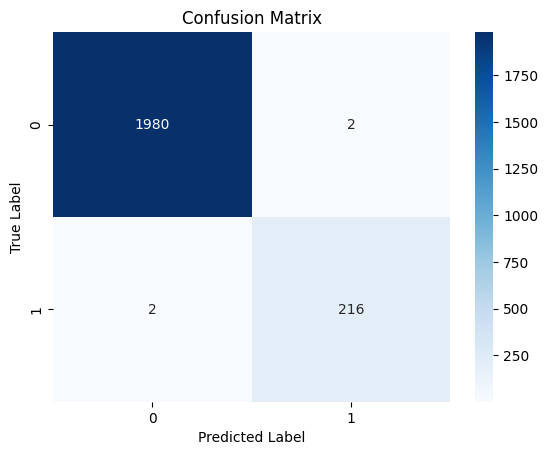

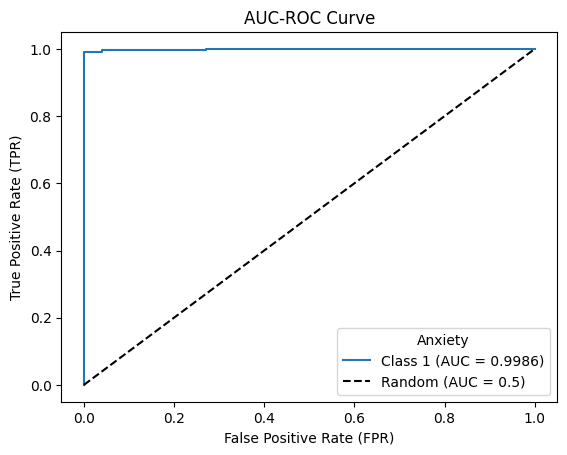

In [22]:
# Train model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Evaluate model
y_pred = model_nb.predict(X_test)
y_prob = model_nb.predict_proba(X_test)

report = classification_report(y_test, y_pred, digits=4)
print(report)

logloss = log_loss(y_test, y_prob[:, 1])
print(f"Log Loss: {logloss:.4f}")

auc_score = roc_auc_score(y_test, y_prob[:, 1])
print(f"AUC Score: {auc_score * 100:.2f}%")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot the AUC-ROC Curve for each class
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class {labels[1]} (AUC = {roc_auc:.4})')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve')
plt.legend(title='Anxiety')
plt.show()

##### Random Forest Model

              precision    recall  f1-score   support

           0     0.9990    1.0000    0.9995      1982
           1     1.0000    0.9908    0.9954       218

    accuracy                         0.9991      2200
   macro avg     0.9995    0.9954    0.9974      2200
weighted avg     0.9991    0.9991    0.9991      2200



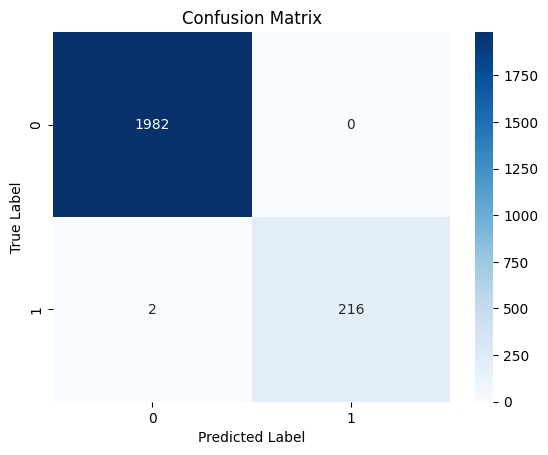

In [23]:
# Train model
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

# Evaluate model
y_pred = model_rf.predict(X_test)

report = classification_report(y_test, y_pred, digits=4)
print(report)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##### Gradient Boosting Model

              precision    recall  f1-score   support

           0     0.9990    0.9995    0.9992      1982
           1     0.9954    0.9908    0.9931       218

    accuracy                         0.9986      2200
   macro avg     0.9972    0.9952    0.9962      2200
weighted avg     0.9986    0.9986    0.9986      2200

Log Loss: 0.0124
AUC Score: 99.57%


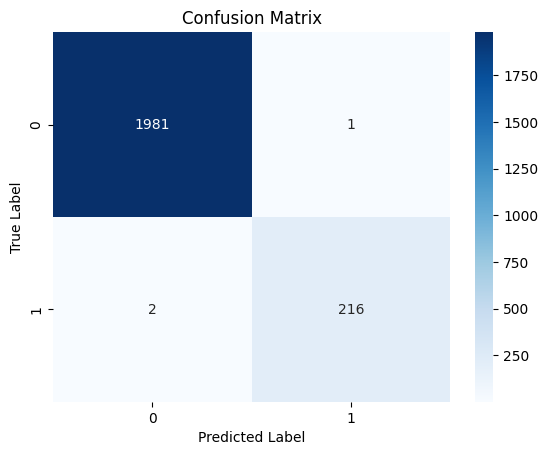

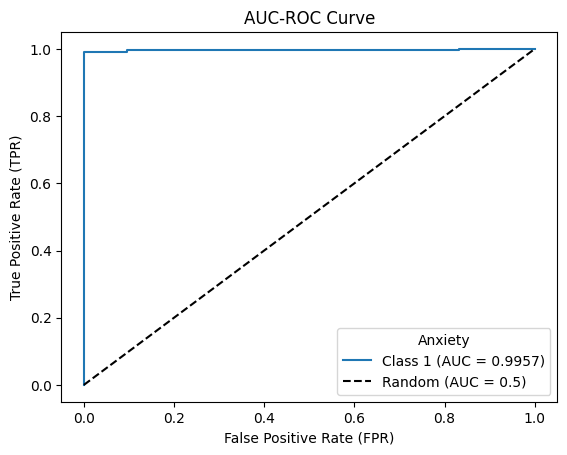

In [24]:
# Train model
model_xgb = XGBClassifier(max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)

# Evaluate model
y_pred = model_xgb.predict(X_test)
y_prob = model_xgb.predict_proba(X_test)

report = classification_report(y_test, y_pred, digits=4)
print(report)

logloss = log_loss(y_test, y_prob[:, 1])
print(f"Log Loss: {logloss:.4f}")

auc_score = roc_auc_score(y_test, y_prob[:, 1])
print(f"AUC Score: {auc_score * 100:.2f}%")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot the AUC-ROC Curve for each class
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class {labels[1]} (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve')
plt.legend(title='Anxiety')
plt.show()

##### Predicting using best Model

Since the Random Forest Model has the best accuracy, it is going to be used for the predicitons.

In [25]:
new_data = pd.DataFrame({'Age': [24],
                         'Gender': ['Male'],
                         'Occupation': ['Student'],
                         'Sleep': [8.0],
                         'Physical_activity': [1.5],
                         'Caffeine_intake': [150],
                         'Alcohol_consumption': [0],
                         'Smoking': ['No'],
                         'Family_history': ['No'],
                         'Stress_level': [2],
                         'Heart_rate': [74],
                         'Breathing_rate': [12],
                         'Sweating_level': [4],
                         'Dizziness': ['No'],
                         'Medication': ['No'],
                         'Therapy_sessions': [0],
                         'Major_life_events': ['No'],
                         'Diet_quality': [7]})

for column in cat_columns:
    new_data[column] = new_data[column].str.upper()

new_data = transformer.transform(new_data)

prediction = model_rf.predict(new_data)

if prediction[0] == 0:
    print("Prediction: Low/No Anxiety")
else:
    print("Prediction: High Anxiety")

Prediction: Low/No Anxiety


### Conclusions

In this project, I analysed the 'Social Anxiety Dataset' dataset from Kaggle and then built different machine learning models to classify the individuals with high and low anxieties. Here are the key points that can be concluded:
1. Individuals between the ages of 20 and 50 who have less than 2 hours of physical activity per week tend to have high anxiety levels.
2. Individuals with high anxiety levels have more therapy sessions per month.
3. Individuals who sleep less than 6 hours a day and intake more than 300 mg of caffeine per day tend to have high anxiety levels.
4. Individuals with high stress levels also have high anxiety levels.
5. To classify the individuals, I built different machine learning models, all of which have above 99 % accuracy:
    * Logistic Regression Model     - 99.05 % accuracy
    * K-Nearest Neighbors Model     - 99.73 % accuracy
    * Naive Bayes Model             - 99.82 % accuracy
    * Random Forest Model           - 99.91 % accuracy
    * Gradient Boosting Model       - 99.86 % accuracy
6. The model with the highest accuracy was the Random Forest Model, which was used for classifying the new data.

#### Suggestions

Here are the suggestions that could be taken away from this project:
1. Having atleast 2 hours of physical activity per week can help in reducing stress and anxiety, especially for individuals between the ages of 20 and 50.
2. It is also important for individuals to have atleast 6 hours of sleep per day to have better control over their stress and anxiety levels.